## House Price Prediction
### House price prediction is a crucial task in the real estate industry and involves using various data-driven methods to estimate the market value of residential properties. It aslo plays a crucial role in helping buyers, sellers, real estate agents, and investors make informed decisions in the housing market by providing estimates of property values based on data-driven insights.

#### Importing all the necessary header files:-

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

#### Reading the dataset

In [ ]:
data=pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Data sc/datasets/Housing.csv")

#### Data pre-processing

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.shape

(545, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
data.bedrooms.unique()

array([4, 3, 5, 2, 6, 1], dtype=int64)

In [ ]:
data.stories.unique()

array([3, 4, 2, 1], dtype=int64)

In [ ]:
data.parking.unique()

array([2, 3, 0, 1], dtype=int64)

In [ ]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
data.corr()

C:\Users\ayush\AppData\Local\Temp\ipykernel_9388\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


#### Data visualisation

C:\Users\ayush\AppData\Local\Temp\ipykernel_9388\2394946621.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='coolwarm')


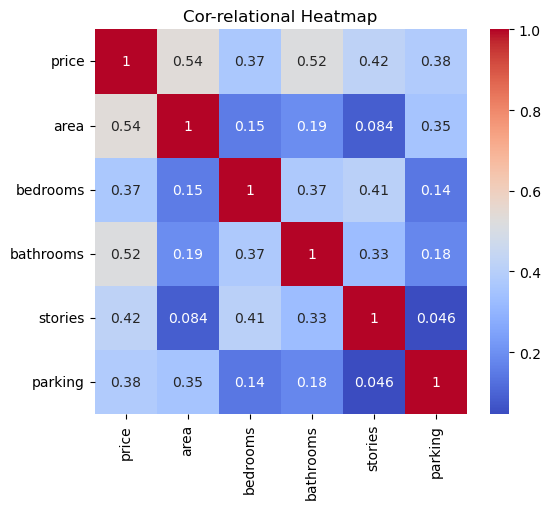

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title("Cor-relational Heatmap")
plt.show()

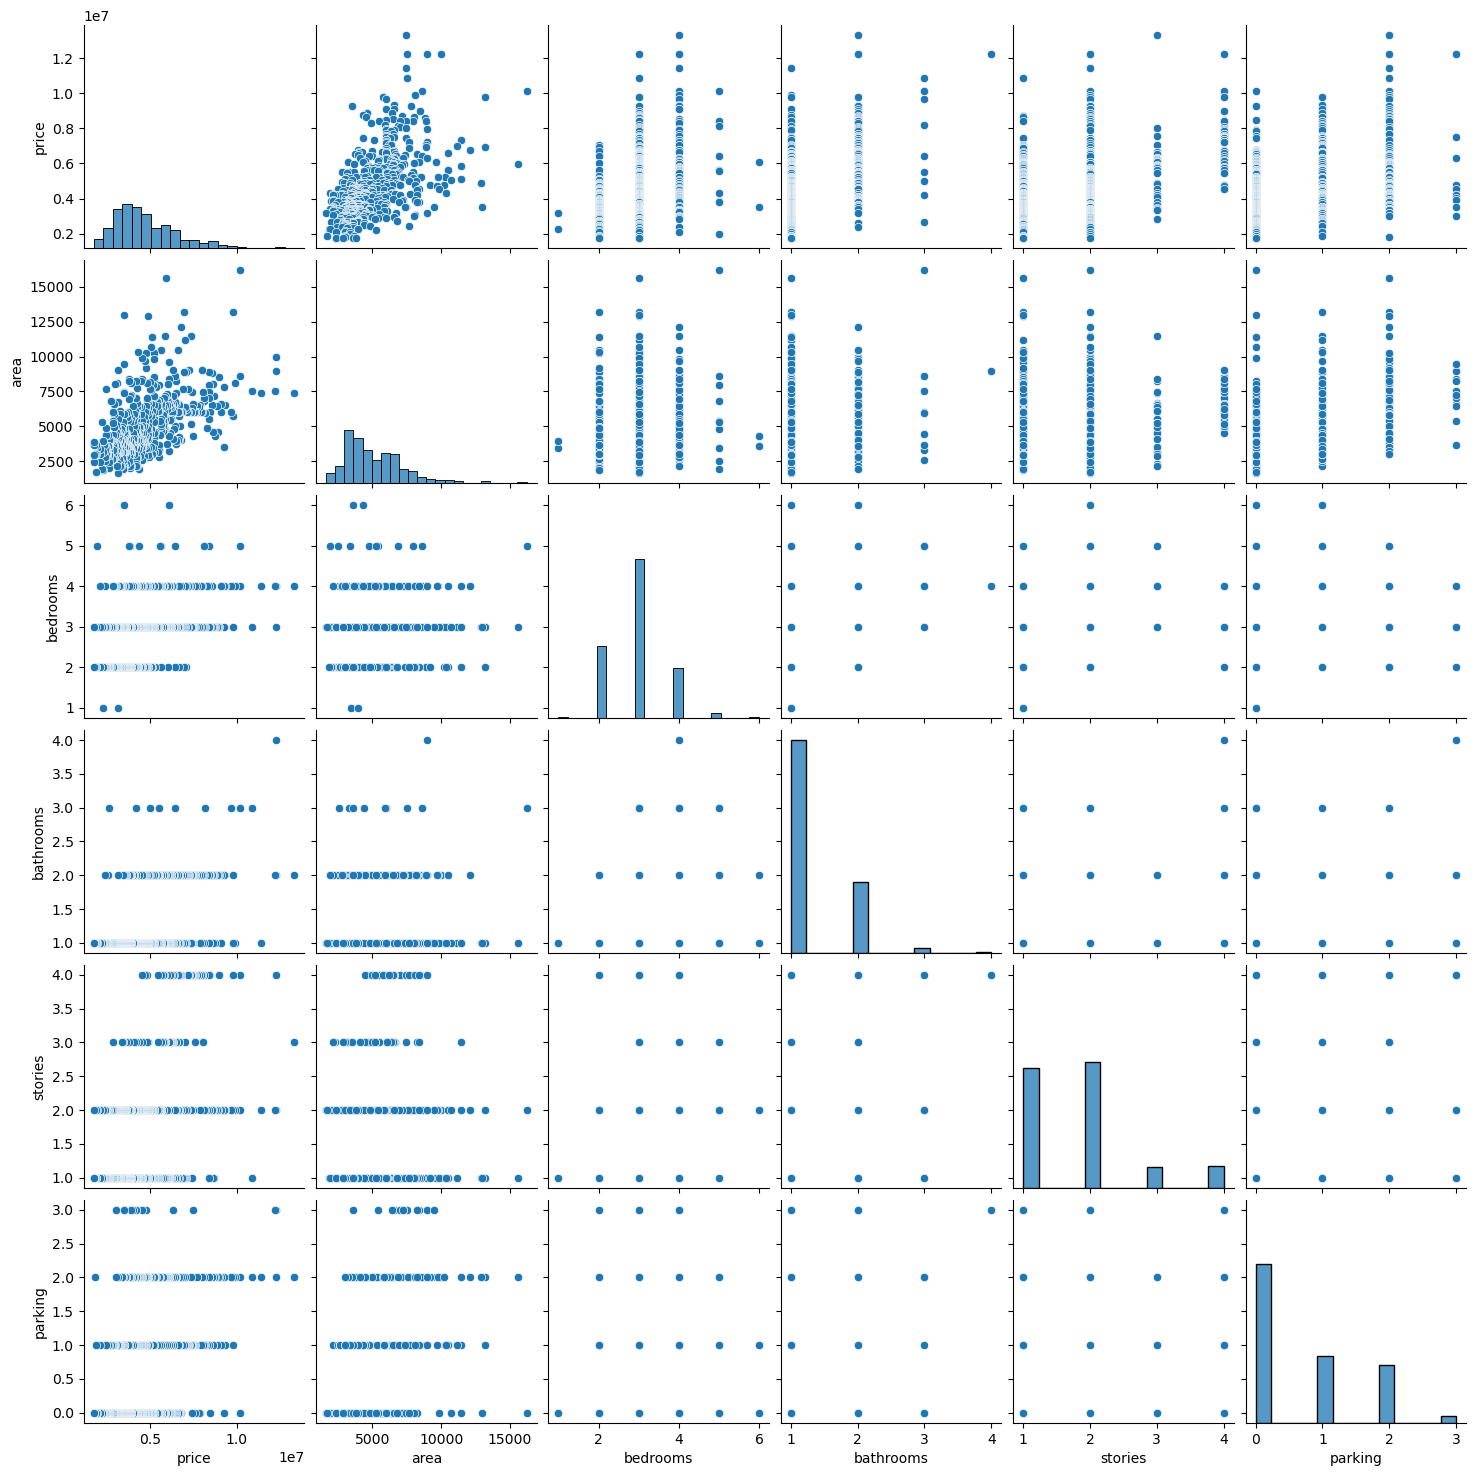

In [ ]:
sns.pairplot(data)

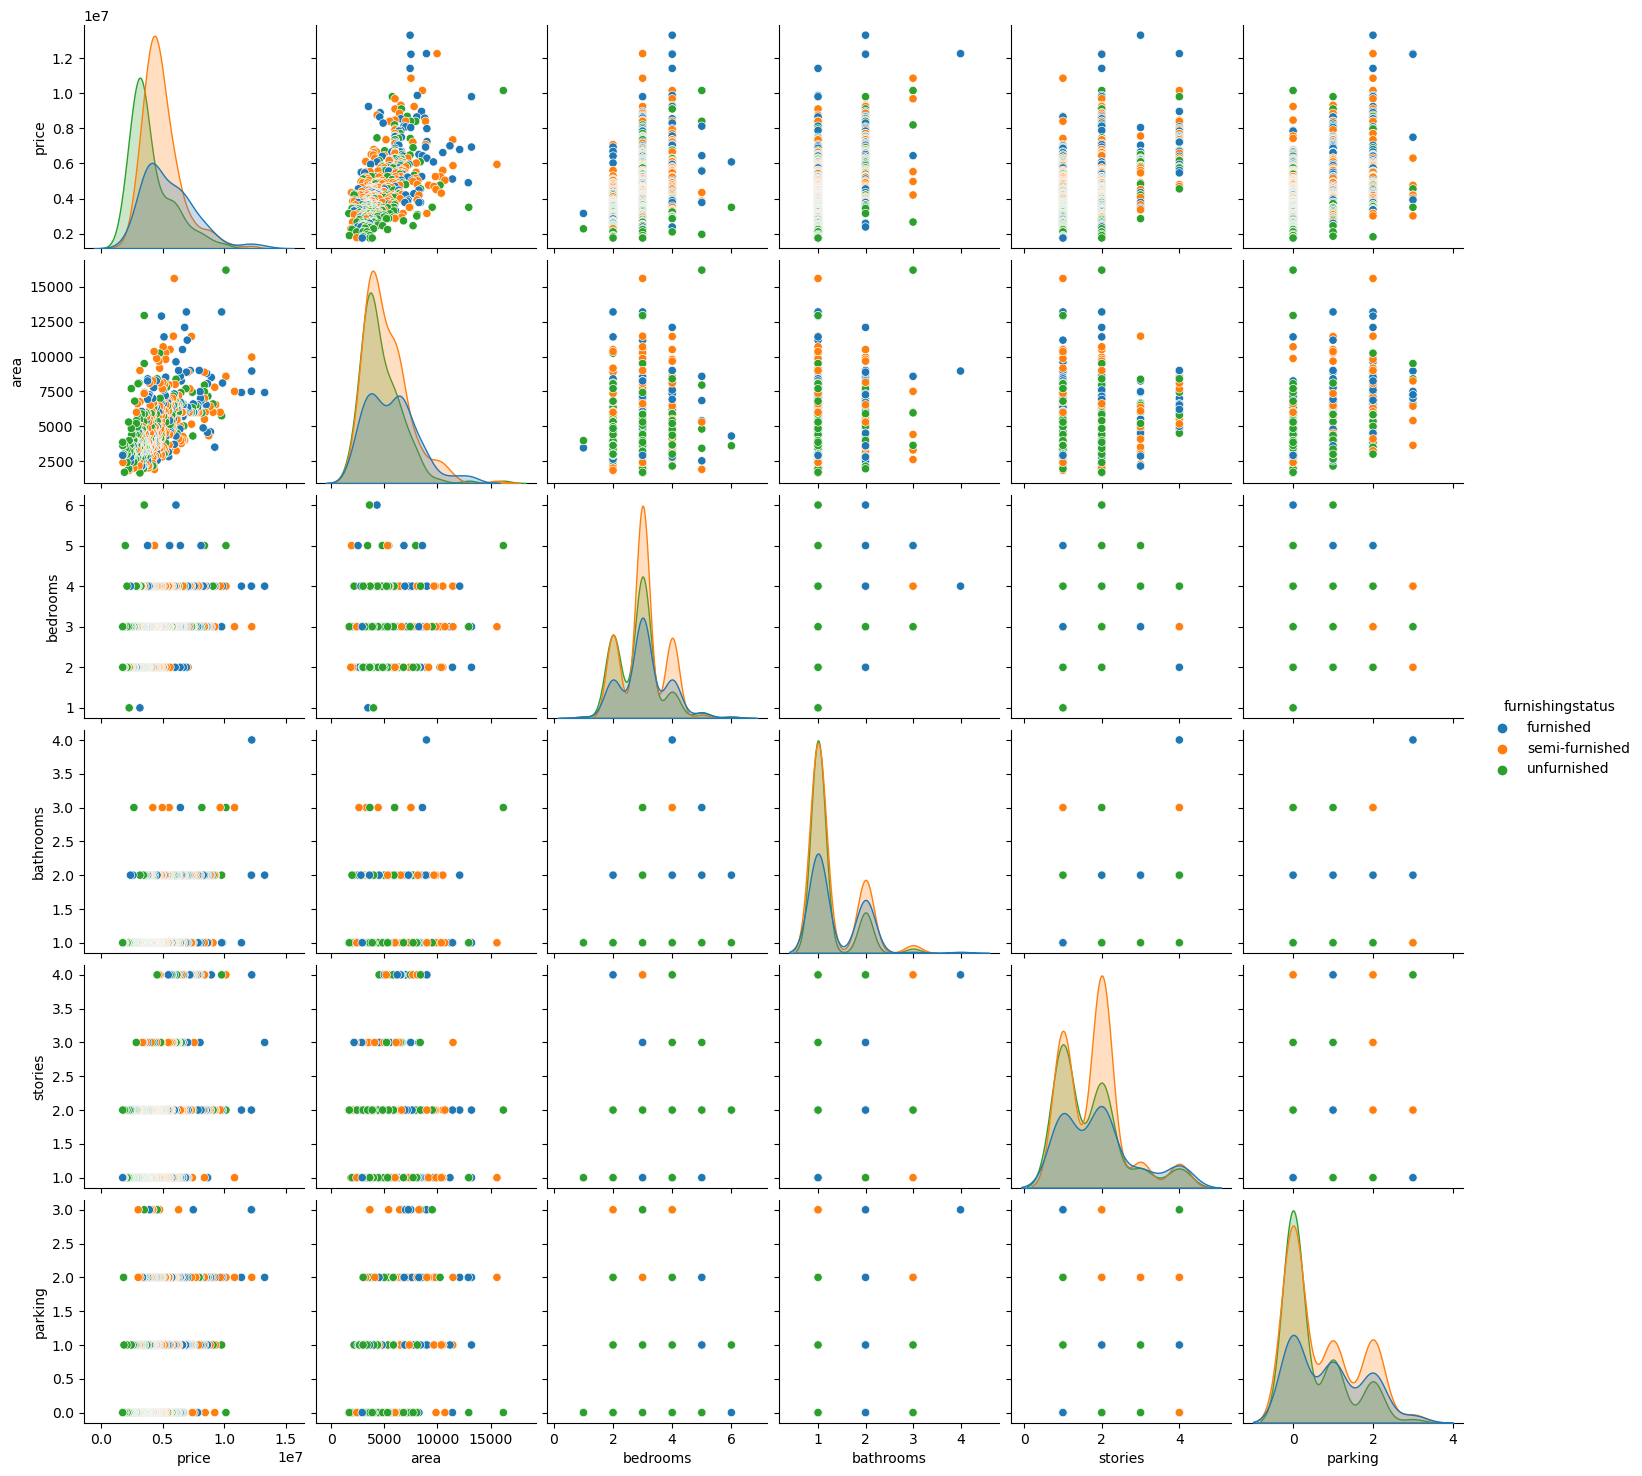

In [ ]:
sns.pairplot(data,hue="furnishingstatus")

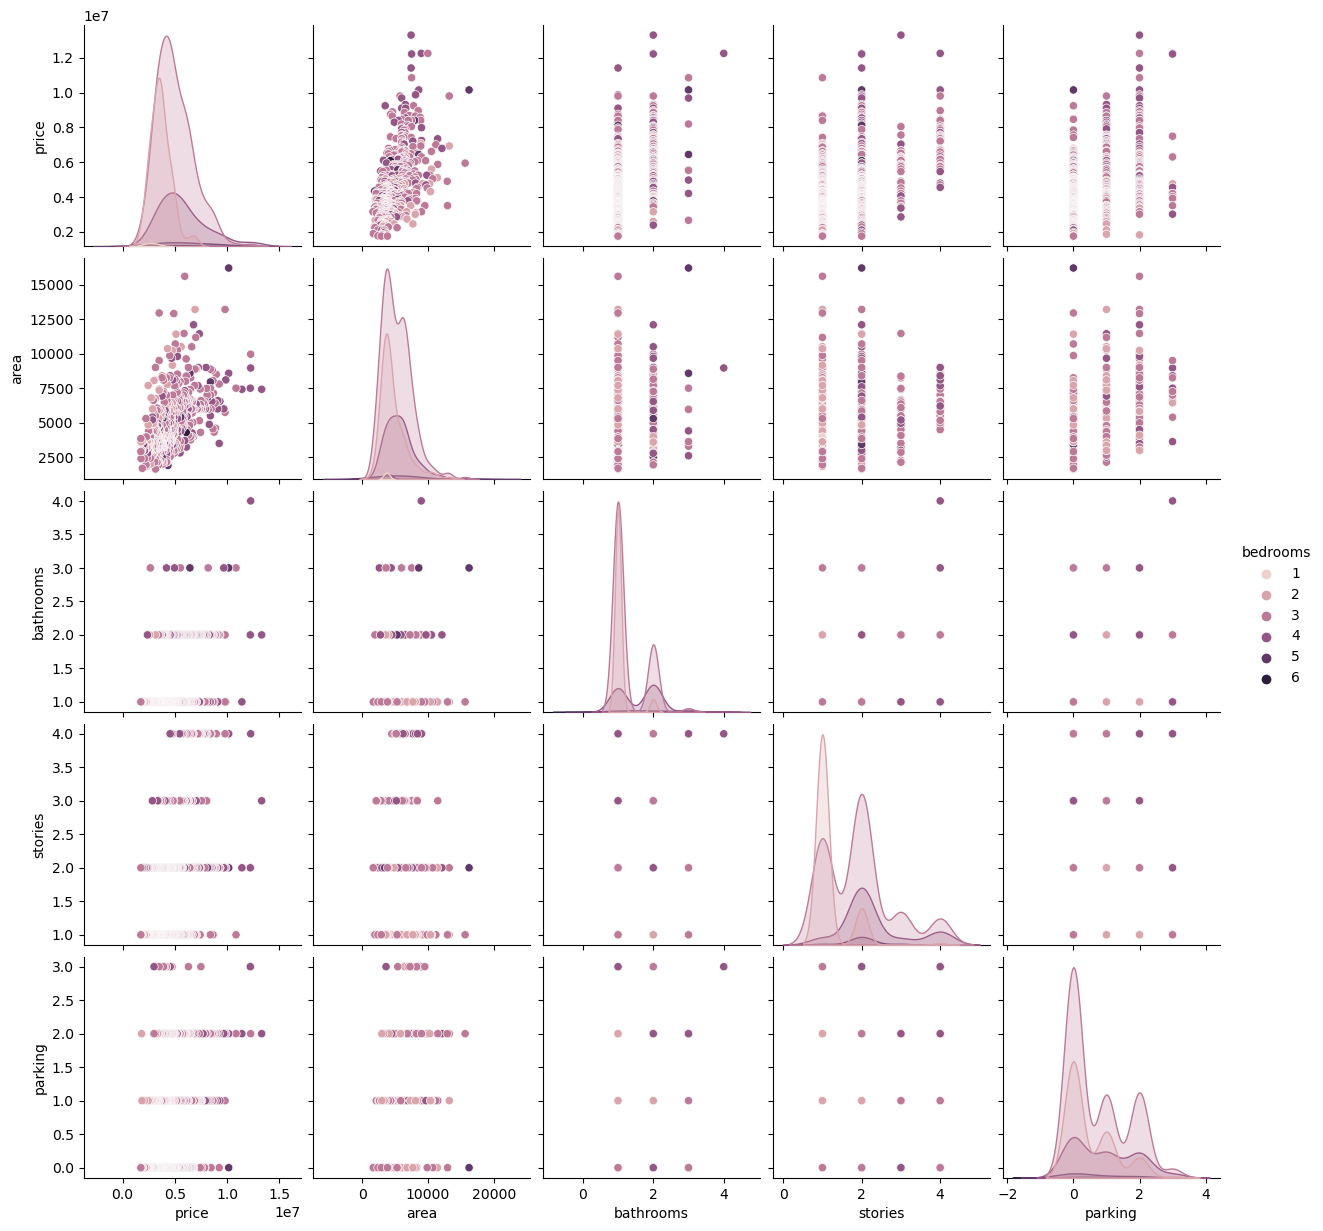

In [ ]:
sns.pairplot(data,hue="bedrooms")

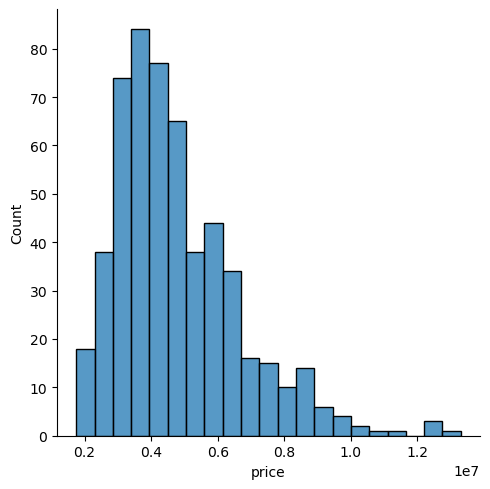

In [ ]:
sns.displot(data['price'])

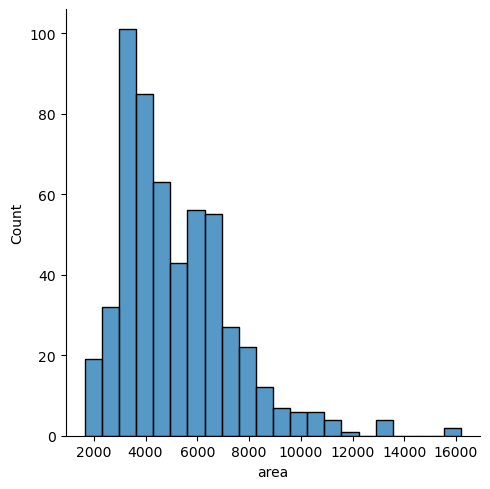

In [ ]:
sns.displot(data['area'])

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

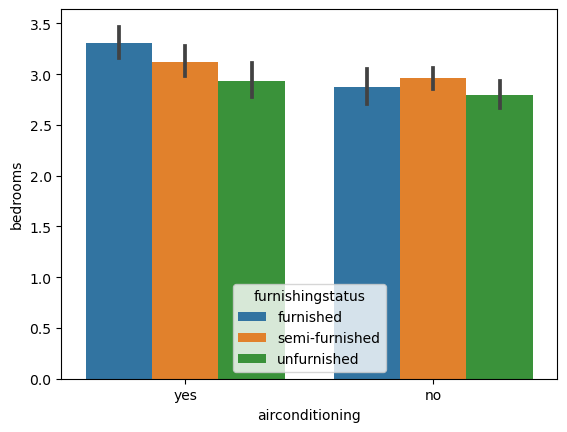

In [ ]:
sns.barplot(x=data['airconditioning'],y=data['bedrooms'],hue=data["furnishingstatus"])

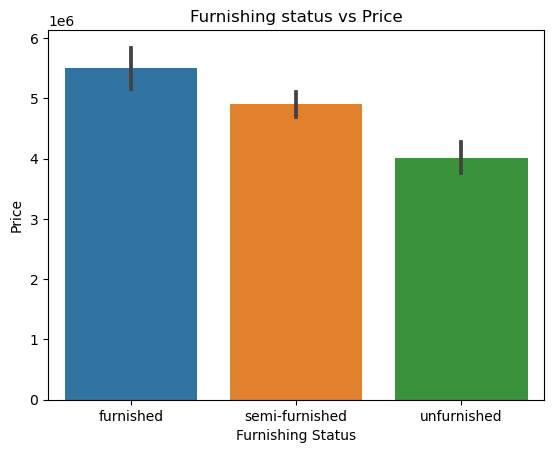

In [ ]:
sns.barplot(x='furnishingstatus', y='price', data=data)
plt.title('Furnishing status vs Price')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

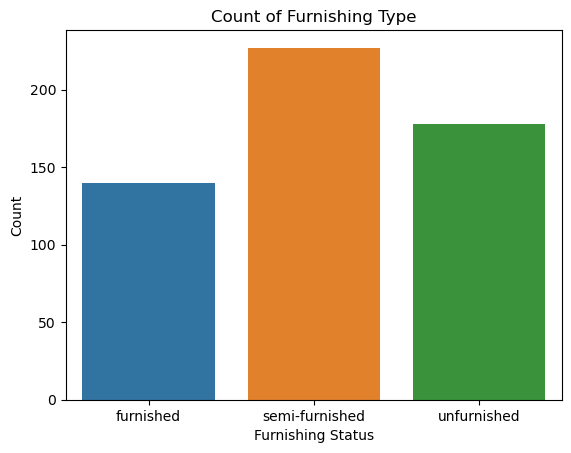

In [ ]:
sns.countplot(x='furnishingstatus', data=data)
plt.title('Count of Furnishing Type')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='hotwaterheating', ylabel='bathrooms'>

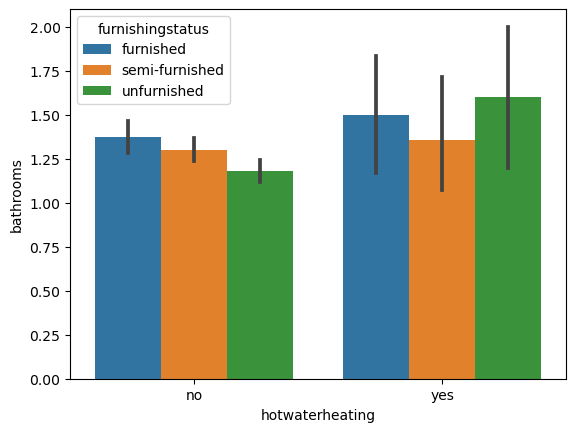

In [ ]:
sns.barplot(x=data['hotwaterheating'],y=data['bathrooms'],hue=data["furnishingstatus"])

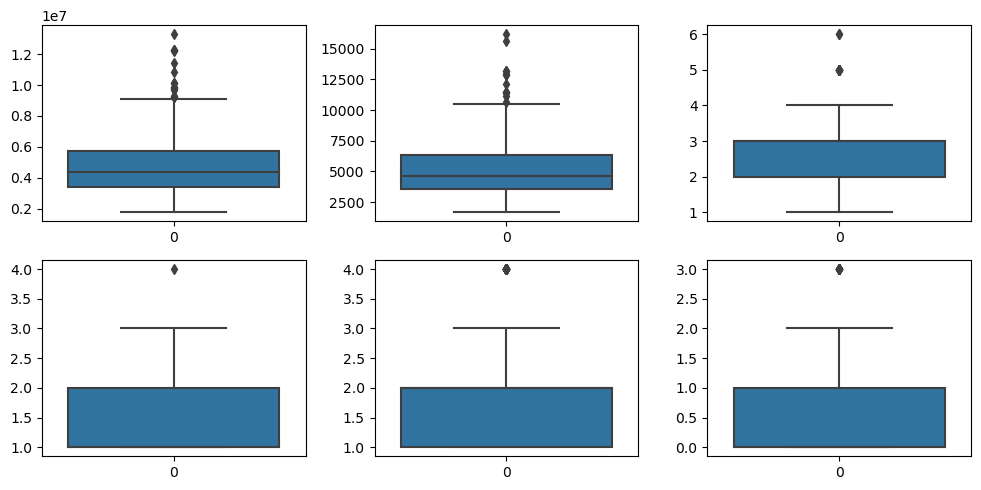

In [ ]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

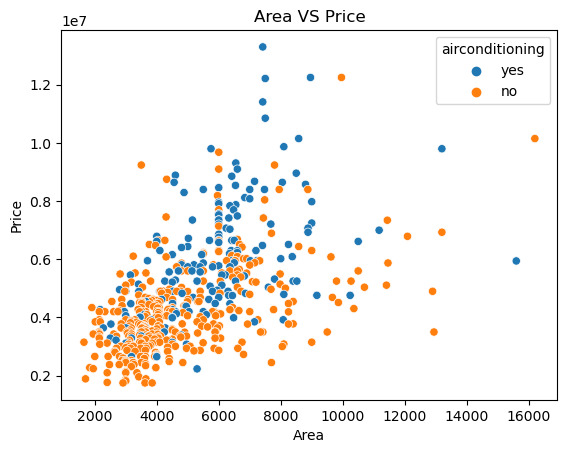

In [ ]:
sns.scatterplot(x='area', y='price',hue='airconditioning', data=data)
plt.title('Area VS Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

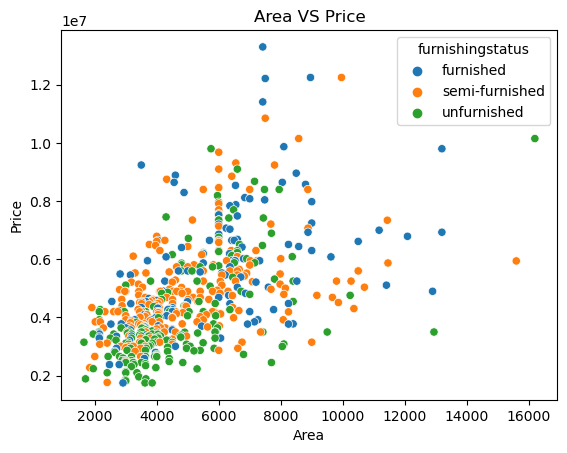

In [ ]:
sns.scatterplot(x='area', y='price',hue='furnishingstatus', data=data)
plt.title('Area VS Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

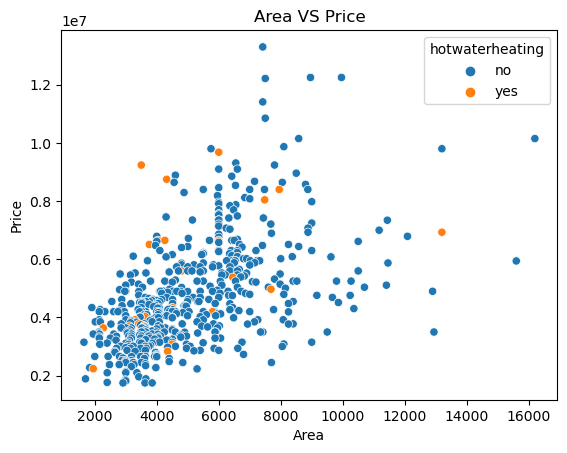

In [ ]:
sns.scatterplot(x='area', y='price',hue='hotwaterheating', data=data)
plt.title('Area VS Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

#### Converting string type value to int type values for training

In [ ]:
# Define a mapping from text labels to numerical values
mapping = {
    'semi-furnished': 1,
    'furnished': 2,
    'unfurnished': 0
}

# Use the map function to replace text labels with numerical values
data['furnishingstatus'] = data['furnishingstatus'].map(mapping)

In [ ]:
# Define a mapping from 'yes' and 'no' to numerical values (1 and 2)
mapping = {'yes': 1, 'no': 0}

# Use the map function to replace values in both columns
data['airconditioning'] = data['airconditioning'].map(mapping)
data['hotwaterheating'] = data['hotwaterheating'].map(mapping)

In [ ]:
data.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,0,1,2,yes,2
1,12250000,8960,4,4,4,yes,no,no,0,1,3,no,2


In [ ]:
x = data.drop(['price','mainroad','prefarea','basement','guestroom'], axis = 1)
y = data['price']

#### Scaling the feature values 

In [ ]:
scalar = StandardScaler()
x_scale = scalar.fit_transform(x)

#### Training the Random forest model

In [ ]:
random = RandomForestRegressor()
#reg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x_scale,y, test_size= 0.2 , random_state=2)

In [ ]:
random.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = random.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print(mae)

1004417.960856269


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared (R^2) Score:", r2)

R-squared (R^2) Score: 0.6087944683651328


#### Training the Linear Regression model

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r2)

Mean Squared Error (MSE): 1388417882146.689
R-squared (R^2) Score: 0.6087944683651328


### Both the models are giving same R2 score i.e 0.6087